<a href="https://colab.research.google.com/github/naoki-yoshi/Task/blob/master/task8_2%E6%AC%A1%E5%85%83%E9%85%8D%E5%88%97%E3%81%A8%E5%8B%BE%E9%85%8D%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 二次元配列と勾配問題

機械学習においては関数の最小値を見つけることが重要になってきます。そのために使われるのが勾配降下法です。

この課題では勾配降下法を理解する準備として、NumPyを用いて関数の勾配を考えていきます。

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### 【問題1】1次関数

$x$ が-50から50の範囲で次の式を考えます。

$$
y = \frac{1}{2}x + 1
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。


In [ ]:
array_x = np.arange(-50, 50.1, 0.1) 
array_y = array_x/2 + 1
print(array_x)
print(array_y)

[-50.  -49.9 -49.8 ...  49.8  49.9  50. ]
[-24.   -23.95 -23.9  ...  25.9   25.95  26.  ]


### 【問題2】配列の結合

問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [ ]:
array_x.shape

(1001,)

In [ ]:
array_xy = np.concatenate((array_x[:, np.newaxis], array_y[:, np.newaxis]), axis=1)
print(array_xy)
print(array_xy.shape) # (3, 2)

[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
(1001, 2)


### 【問題3】勾配を求める



In [ ]:
# (1番目以降のy - 末尾未満のy)/(1番目以降のx - 末尾未満のx)
gradient = (array_xy[1:, 1] - array_xy[:-1, 1])/(array_xy[1:, 0] - array_xy[:-1, 0])
print(gradient)
print(gradient.shape)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

### 【問題4】グラフを描く



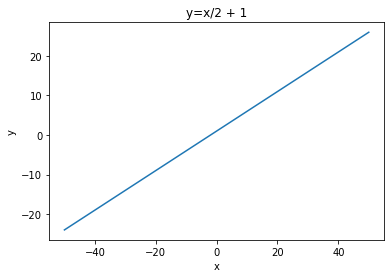

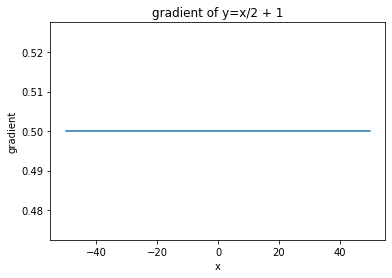

In [ ]:
plt.title("y=x/2 + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy[:, 0], array_xy[:, 1])
plt.show()

plt.title("gradient of y=x/2 + 1")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy[:-1, 0], gradient)
plt.show()

### 【問題5】Pythonの関数化




In [ ]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    勾配を計算する。

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n,)
    関数の勾配
    """
    array_x = np.arange(*x_range) # 展開して引数として渡す
    array_y = function(array_x)
    array_xy = np.concatenate((array_x[:, np.newaxis], array_y[:, np.newaxis]), axis=1)
    gradient = (array_xy[1:, 1] - array_xy[:-1, 1])/(array_xy[1:, 0] - array_xy[:-1, 0])
    return array_xy, gradient

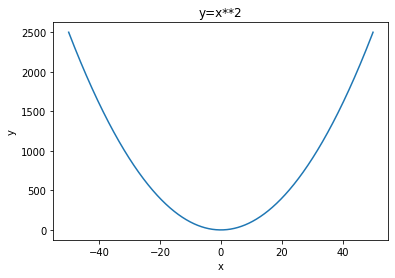

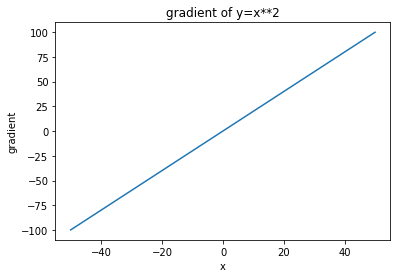

In [ ]:
def function_a(array_x):
    """
    y = x**2の関数。xのndarrayを入れるとyのndarrayを返す。

    Parameters
    ----------------
    array_x : ndarray, shape(n,)

    Returns
    ----------------
    ndarray, shape(n,)  
    """
    return array_x**2
  
array_xy2, gradient2 = compute_gradient(function_a)

plt.title("y=x**2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy2[:, 0], array_xy2[:, 1])
plt.show()

plt.title("gradient of y=x**2")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy2[:-1, 0], gradient2)
plt.show()

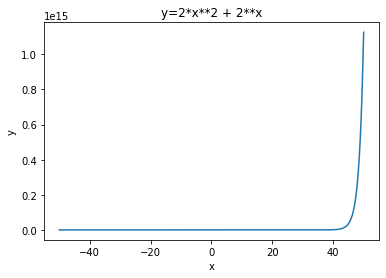

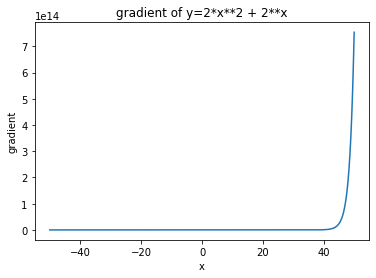

In [ ]:
def function_b(array_x):
    """
    y = 2**xの関数。xのndarrayを入れるとyのndarrayを返す。

    Parameters
    ----------------
    array_x : ndarray, shape(n,)

    Returns
    ----------------
    ndarray, shape(n,)  
    """
    return 2*array_x**2 + 2**array_x
  
array_xy3, gradient3 = compute_gradient(function_b)

plt.title("y=2*x**2 + 2**x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy3[:, 0], array_xy3[:, 1])
plt.show()

plt.title("gradient of y=2*x**2 + 2**x")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy3[:-1, 0], gradient3)
plt.show()

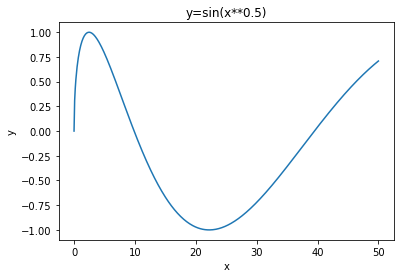

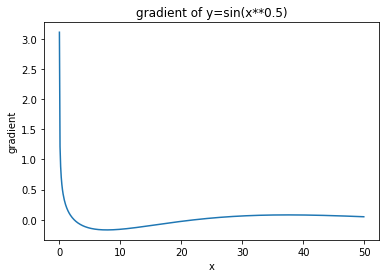

In [ ]:
def function_c(array_x):
    """
    y = sin(x**0.5)の関数。xのndarrayを入れるとyのndarrayを返す。

    Parameters
    ----------------
    array_x : ndarray, shape(n,)

    Returns
    ----------------
    ndarray, shape(n,)  
    """
    return np.sin(array_x**0.5)

array_xy4, gradient4 = compute_gradient(function_c, x_range=(0, 50.1, 0.1))# 開始をマイナスにすると警告が出るので０開始にしている

plt.title("y=sin(x**0.5)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(array_xy4[:, 0], array_xy4[:, 1])
plt.show()

plt.title("gradient of y=sin(x**0.5)")
plt.xlabel("x")
plt.ylabel("gradient")
plt.plot(array_xy4[:-1, 0], gradient4)
plt.show()

### 【問題6】最小値を求める



In [ ]:
print(array_xy2.min(axis=0)[1], array_xy2.argmin(axis=0)[1])
print(array_xy3.min(axis=0)[1], array_xy3.argmin(axis=0)[1])
print(array_xy4.min(axis=0)[1], array_xy4.argmin(axis=0)[1])

5.048709793414476e-25 500
0.9505505632959851 498
-0.9999997540298113 222


### 元のグラフが下に凸なグラフになっていることがわかる

In [ ]:
# 前後の勾配の±10を取得している。
gradient2[490:510]

array([-1.9, -1.7, -1.5, -1.3, -1.1, -0.9, -0.7, -0.5, -0.3, -0.1,  0.1,
        0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9])

In [ ]:
gradient3[488:508]

array([-4.28758786, -3.86516496, -3.44113269, -3.01537554, -2.58776971,
       -2.15818251, -1.72647174, -1.29248498, -0.85605887, -0.41701833,
        0.02482428,  0.46967008,  0.91773463,  1.36924892,  1.82446058,
        2.28363497,  2.74705652,  3.21503004,  3.68788226,  4.16596334])

In [ ]:
gradient4[212:232]

array([-0.01111112, -0.00991828, -0.00873263, -0.00755423, -0.00638312,
       -0.00521937, -0.00406302, -0.00291412, -0.00177271, -0.00063884,
        0.00048745,  0.00160612,  0.00271712,  0.00382043,  0.004916  ,
        0.0060038 ,  0.00708379,  0.00815594,  0.00922022,  0.0102766 ])